In [3]:
import numpy as np
import pandas as pd
import edhec_risk_kit_206 as erk


In [6]:
ind_rets = erk.get_ind_returns(weighting="vw", n_inds=30)["1997":]

In [9]:
ind_mcap = erk.get_ind_market_caps(30, weights=True)["1997":]

In [11]:
ind_mcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1997-01,0.027453,0.027252,0.014657,0.014549,0.011205,0.025672,0.006593,0.095988,0.028149,0.001899,...,0.065783,0.057842,0.103735,0.023032,0.017045,0.013505,0.048590,0.011023,0.176038,0.013620
1997-02,0.026682,0.028846,0.014576,0.014316,0.010713,0.025952,0.006670,0.099849,0.027762,0.001904,...,0.063793,0.058032,0.108629,0.022150,0.016487,0.012846,0.045951,0.010645,0.177737,0.013857
1997-03,0.027449,0.029690,0.016412,0.014255,0.010974,0.026720,0.006892,0.100769,0.027942,0.001947,...,0.065093,0.055129,0.099954,0.023194,0.016323,0.012745,0.048527,0.010327,0.184445,0.013245
1997-04,0.028461,0.029152,0.014778,0.014524,0.011629,0.026376,0.006836,0.097989,0.028734,0.001990,...,0.060846,0.054577,0.099719,0.023305,0.017126,0.012494,0.050369,0.011032,0.180462,0.013316
1997-05,0.028110,0.031130,0.014630,0.014290,0.011052,0.027371,0.006287,0.099571,0.028439,0.001844,...,0.059260,0.057527,0.100968,0.023158,0.017307,0.012038,0.048729,0.011220,0.183199,0.012890


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857


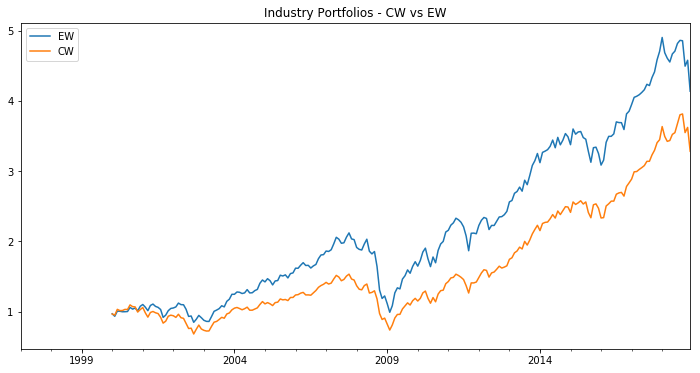

In [12]:
ewr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
cwr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
erk.summary_stats(btr.dropna())

In [22]:
erk.tracking_error(ewr, cwr)

0.18736759551222992

In [19]:
tethered=erk.weight_ew(ind_rets, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=0.01)


In [20]:
tethered

Food     0.045347
Beer     0.045347
Smoke    0.033232
Games    0.032987
Books    0.025405
Hshld    0.045347
Clths    0.000000
Hlth     0.045347
Chems    0.045347
Txtls    0.000000
Cnstr    0.030584
Steel    0.000000
FabPr    0.045347
ElcEq    0.045347
Autos    0.045347
Carry    0.027093
Mines    0.000000
Coal     0.000000
Oil      0.045347
Util     0.045347
Telcm    0.045347
Servs    0.045347
BusEq    0.045347
Paper    0.045347
Trans    0.038647
Whlsl    0.030620
Rtail    0.045347
Meals    0.024993
Fin      0.045347
Other    0.030882
dtype: float64

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
EW-Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857


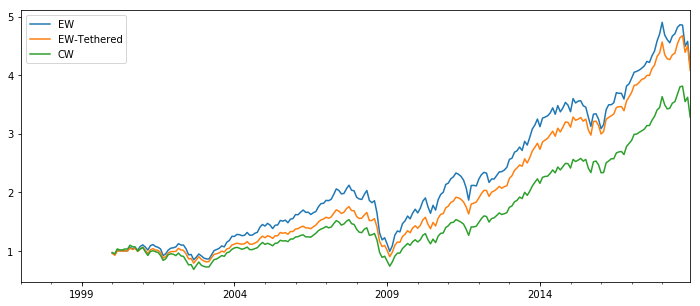

In [24]:
ewr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
ewtr = erk.backtest_ws(ind_rets,estimation_window=36, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=.01)
cwr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)
btr = pd.DataFrame({"EW": ewr, "EW-Tethered": ewtr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,5))
erk.summary_stats(btr.dropna())

In [25]:
erk.tracking_error(ewtr , cwr)

0.1165066134512106

In [26]:
def sample_cov(r, **kwargs):
    """
    Returns the sample covariance of the supplied returns
    """
    return r.cov()

def weight_gmv(r, cov_estimator=sample_cov, **kwargs):
    """
    Produces the weights of the GMV portfolio given a covariance matrix of the returns 
    """
    est_cov = cov_estimator(r, **kwargs)
    return erk.gmv(est_cov)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857
GMV-Sample,0.066305,0.117410,-0.741086,4.469204,0.055456,0.080583,0.300812,-0.421289


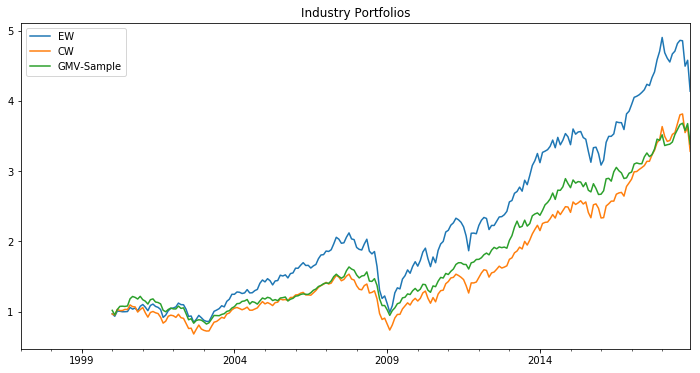

In [27]:
mv_s_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=sample_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())

In [33]:
import statsmodels.stats.moment_helpers as mh
def cc_cov(r, **kwargs):
    rhos = r.corr()
    n = rhos.shape[0]
    # this is a symmetric matrix with diagonals all 1 - so the mean correlation is ...
    rho_bar = (rhos.values.sum()-n)/(n*(n-1))
    ccor = np.full_like(rhos, rho_bar)
    np.fill_diagonal(ccor, 1.)
    sd = r.std()
    ccov = ccor * np.outer(sd, sd)
#     mh.corr2cov(ccor, sd)
    return pd.DataFrame(ccov, index=r.columns, columns=r.columns)

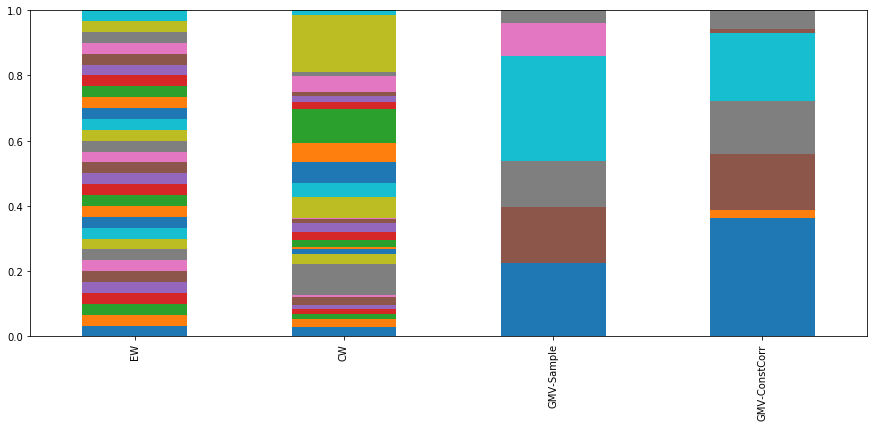

In [34]:
wts = pd.DataFrame({
    "EW": erk.weight_ew(ind_rets["1997":]),
    "CW": erk.weight_cw(ind_rets["1997":], cap_weights=ind_mcap),
    "GMV-Sample": weight_gmv(ind_rets["1997":], cov_estimator=sample_cov),
    "GMV-ConstCorr": weight_gmv(ind_rets["1997":], cov_estimator=cc_cov),
})
wts.T.plot.bar(stacked=True, figsize=(15,6), legend=False);


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857
GMV-Sample,0.066305,0.117410,-0.741086,4.469204,0.055456,0.080583,0.300812,-0.421289
GMV-CC,0.074340,0.111390,-0.723775,4.153291,0.051800,0.074171,0.387296,-0.340626


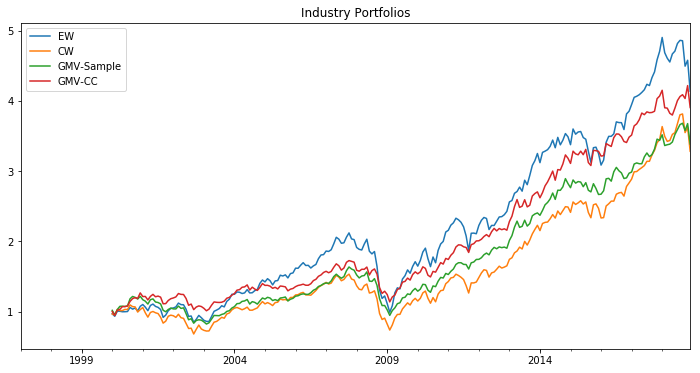

In [35]:
mv_cc_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=cc_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())

### Skrinkage

In [39]:
def shrinkage_cov(r, delta=0.25, **kwargs):
    """
    Covariance estimator that shrinks between the Sample Covariance and the Constant Correlation Estimators
    """
    prior = cc_cov(r, **kwargs)
    sample = sample_cov(r, **kwargs)
    return delta*prior + (1-delta)*sample

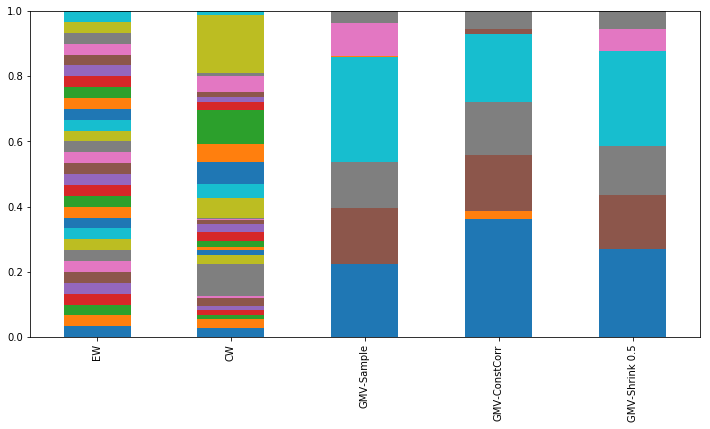

In [40]:
wts = pd.DataFrame({
    "EW": erk.weight_ew(ind_rets["1997":]),
    "CW": erk.weight_cw(ind_rets["1997":], cap_weights=ind_mcap),
    "GMV-Sample": weight_gmv(ind_rets["1997":], cov_estimator=sample_cov),
    "GMV-ConstCorr": weight_gmv(ind_rets["1997":], cov_estimator=cc_cov),
    "GMV-Shrink 0.5": weight_gmv(ind_rets["1997":], cov_estimator=shrinkage_cov),
})
wts.T.plot.bar(stacked=True, figsize=(12,6), legend=False);


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857
GMV-Sample,0.066305,0.117410,-0.741086,4.469204,0.055456,0.080583,0.300812,-0.421289
GMV-CC,0.074340,0.111390,-0.723775,4.153291,0.051800,0.074171,0.387296,-0.340626
GMV-Shrink 0.25,0.068467,0.114572,-0.731286,4.264934,0.053884,0.077715,0.326638,-0.393410


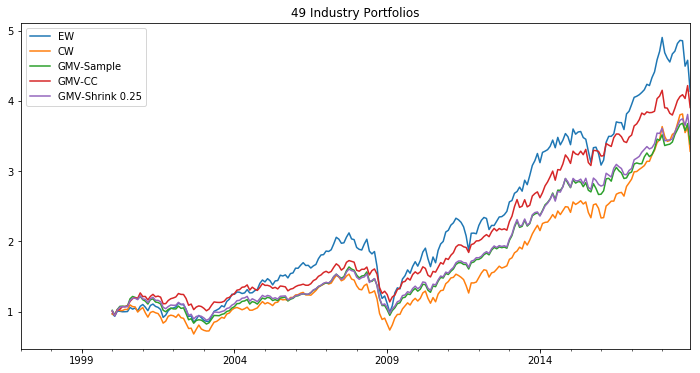

In [42]:
mv_sh_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=shrinkage_cov, delta=0.25)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r, 'GMV-Shrink 0.25': mv_sh_r})
(1+btr).cumprod().plot(figsize=(12,6), title="49 Industry Portfolios")
erk.summary_stats(btr.dropna())